# Использование TfidfVectorizer для получения относительных частот лемм в тексте

In [500]:
# сначала откроем все списки, которые понадобятся для создания таблицы и для проверки результата
# не знаю, что за библиотека ast, но только с ее помощью получилось открыть записанный в файл список как список, а не как строку
with open("texts_in_corpus_lemmas.txt", "r", encoding='utf-8') as file:
    text = file.read()
import ast
texts_in_corpus_lemmas = ast.literal_eval(text)

with open("corpus_files_names.txt", "r", encoding='utf-8') as file:
    text = file.read()
corpus_files_names = ast.literal_eval(text)

with open("prince_lemmas.txt", "r", encoding='utf-8') as file:
    text = file.read()
prince_lemmas = ast.literal_eval(text)

with open("corpus_lemmas.txt", "r", encoding='utf-8') as file:
    text = file.read()
corpus_lemmas = ast.literal_eval(text)

In [69]:
# проверяю, что правильно открылся спислок перечней лемм
# он специально сохранен как список строк, потому что что sklearn работает с текстами, а не со списками
# каждая строка содержит все леммы одного файла
len(texts_in_corpus_lemmas)

1304

In [70]:
# еще раз проверяю, что правильно открылся список перечней лемм
print(texts_in_corpus_lemmas[0][0:10])

В КРЕМЛЬ И


In [1]:
# зовем sklearn, документация:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# делала то в Colab, то в Jupyter, в одном работало sklearn, в другом -U scikit-learn
!pip3 install sklearn
!pip3 install -U scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

* по умолчанию в TfidfVectorizer стоит такой параметр: token_pattern='(?u)\b\w\w+\b'
 (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
,
* это значит, что однобуквенные слова не проходят, а я хочу, чтобы проходили.
* Кроме того мне нужны слова с дефисом, поэтому меняю token_pattern.
* Проверяем вот здесь https://regex101.com/r/F8dY80/3.
* Ко всему прочему я бы хотела, чтобы слово "И" у меня не пролезло, поэтому я ставлю ограничение на слова, которые входят в более, чем 90 процентов текстов. Это max_df = 0.9. 
* Добавила постепенно ограничение 0.7, чтобы изгнать "он", "быть"

In [430]:
# задаем наши параметры - схема токена и отбрасываемые слишком частые слова
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+-?\w*\b", max_df = 0.9)

In [431]:
# применяем эту штуку с нашими параметрами к списку перечней лемм
tfidf = tfidf_vectorizer.fit_transform(texts_in_corpus_lemmas)

In [432]:
tfidf.shape

(1304, 55211)

In [433]:
words = tfidf_vectorizer.get_feature_names_out()
len(words)

55211

In [148]:
!pip3 install pandas


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip


In [303]:
import pandas as pd

In [434]:
# формируем таблицу со словами и именами файлов
data = tfidf.todense().tolist() 
SynTagRusTable = pd.DataFrame(data, columns = words, index = corpus_files_names)

In [435]:
#строка, соответствующая нашему тексту
print(len(SynTagRusTable.loc['Malenkii_prints']))

55211


In [436]:
# сохраним в переменную, чтобы посмотреть, что это за объект
prints_tf_list = SynTagRusTable.loc['Malenkii_prints']

In [437]:
# что это за объект
# пробовала обходиться с Series как со словарем - это не работает, 
# нужно смотреть в описании Pandas, как с таким типом обходиться
print(type(prints_tf_list))

<class 'pandas.core.series.Series'>


In [438]:
# проверим, что внутри
prints_tf_list[54950:55000]
# в начале этой штуки сначала получались числа, потом слова на латинице
# можно пробовать разные кусочки, этот (от 54950:55000) мне нужен для того, чтобы убедиться, что token_pattern не вычеркнул слово "я"

юргенсон         0.000000
юргинский        0.000000
юридически       0.000000
юридический      0.000000
юрий             0.000000
юрин             0.000000
юрисдикция       0.000000
юрисконсульт     0.000000
юриспруденция    0.000000
юрист            0.000000
юрка             0.000000
юркий            0.000000
юркин            0.000000
юркнуть          0.000000
юрковато         0.000000
юрлицо           0.000000
юродивый         0.000000
юрский           0.000000
юрфак            0.000000
юрьев            0.000000
юрьевич          0.000000
юрьенен          0.000000
юс               0.000000
юсб              0.000000
юсов             0.000000
юстас            0.000000
юстина           0.000000
юстиция          0.002561
юсуповский       0.000000
юсуфов           0.000000
юта              0.000000
ютианский        0.000000
ютиться          0.000000
юткин            0.000000
ютландский       0.000000
ютьюб            0.000000
юф               0.000000
юшенков          0.000000
юшин        

In [439]:
# проверяю, что "и" не входит - отлично, получается ошибка
prints_tf_list["и"]

KeyError: 'и'

In [440]:
# еще раз проверяю, что "я" входит
# именно здесь в первый проход я обнаружила, что нужно поменять token_pattern с того, который был по умолчанию
prints_tf_list["я"]

0.5133337108908528

In [441]:
# способ извлечь максимальное значение по образцу cars.agg('max')
prints_tf_list.agg('max')

0.5133337108908528

In [442]:
# еще один способ извлечь максимальное значение
prints_tf_list.max()

0.5133337108908528

In [443]:
# можно сортировать
#Series.sort_values ​​( ось = 0 , по возрастанию = True , inplace = False , kind = 'quicksort' , na_position = 'last' , ignore_index = False , key = None ) 
prints_tf_list.sort_values(ascending=False)

я            0.513334
принц        0.421618
маленький    0.263881
ты           0.238299
он           0.227041
               ...   
искорка      0.000000
искра        0.000000
искренне     0.000000
искренний    0.000000
і            0.000000
Name: Malenkii_prints, Length: 55211, dtype: float64

In [444]:
# вычеркнуть нулевые значения просто так не получилось,
# нужно делать это таким хитрым переповыподвертом, извлекается это знание отсюда, но не только:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.loc.html
unempty_values_lemmas = prints_tf_list.loc[lambda x: x != 0.0]

In [445]:
# проверяем, что количество уменьшилось
len(unempty_values_lemmas)

1998

In [446]:
# проверяем, что внутри
unempty_values_lemmas[0:50]

1             0.003513
1909          0.002914
1920          0.002496
2             0.002383
325           0.003416
3251          0.003416
326           0.003416
327           0.003231
328           0.003231
329           0.003231
330           0.002914
612           0.013664
i             0.002096
ii            0.002026
iii           0.002342
iv            0.002527
ix            0.002998
v             0.002729
vi            0.002914
vii           0.002998
viii          0.002998
x             0.002342
xi            0.002844
xii           0.002638
xiii          0.002496
xiv           0.002638
xix           0.001737
xv            0.002598
xvi           0.002301
xvii          0.002245
xviii         0.002109
xx            0.001668
xxi           0.002005
xxii          0.003231
xxiii         0.003416
xxiv          0.003416
xxv           0.003416
xxvi          0.003416
xxvii         0.002914
а             0.082826
абсолютный    0.001726
авария        0.002109
австралия     0.002195
азбучный   

In [447]:
# посмотрим в порядке убывания, заодно проверим, что нули действительно не вошли
unempty_values_lemmas.sort_values(ascending=False)

я              0.513334
принц          0.421618
маленький      0.263881
ты             0.238299
он             0.227041
                 ...   
хотя           0.000927
происходить    0.000921
считать        0.000864
россия         0.000818
страна         0.000816
Name: Malenkii_prints, Length: 1998, dtype: float64

*Теперь проверяем разницу между исходным списком и тем, которые получился в результате процедуры подсчета  tfidf*

In [448]:
# превращаем упорядоченный Series в словарь
prince_lemmas_dict = unempty_values_lemmas.sort_values(ascending=False).to_dict()

In [449]:
# получилось? да
type(prince_lemmas_dict)

dict

In [450]:
# из словаря можно сделать список ключей - это как раз леммы после 
list(prince_lemmas_dict.keys())

['я',
 'принц',
 'маленький',
 'ты',
 'он',
 'не',
 'барашек',
 'сказать',
 'планета',
 'быть',
 'что',
 'это',
 'цветок',
 'лис',
 'звезда',
 'мой',
 'они',
 'а',
 'но',
 'фонарщик',
 'у',
 'король',
 'очень',
 'она',
 'как',
 'географ',
 'баобаб',
 'спрашивать',
 'рисовать',
 'да',
 'роза',
 'вы',
 'вот',
 'взрослый',
 'с',
 'отвечать',
 'все',
 'приручать',
 'один',
 'когда',
 'если',
 'так',
 'весь',
 'пустыня',
 'ведь',
 'шип',
 'видеть',
 'такой',
 'знать',
 'этот',
 'вулкан',
 'нет',
 'потом',
 'же',
 'человек',
 'твой',
 'друг',
 'день',
 'змея',
 'мочь',
 'добрый',
 'смотреть',
 'бы',
 'честолюбец',
 'удав',
 'чтобы',
 'понимать',
 'себя',
 'пьяница',
 'совсем',
 'еще',
 'о',
 'планетка',
 'подумать',
 'пятьсот',
 'солнце',
 'только',
 'колодец',
 'свой',
 'фонарь',
 'путешественник',
 'ни',
 'цветы',
 'рисунок',
 'малыш',
 'никогда',
 'раз',
 'засмеяться',
 'песок',
 'то',
 'земля',
 'стрелочник',
 'от',
 'потухать',
 'прибавлять',
 'для',
 'тоже',
 'уговор',
 'гм',
 'астерои

In [504]:
print(list(prince_lemmas_dict.keys())[0:49])

['я', 'принц', 'маленький', 'ты', 'он', 'не', 'барашек', 'сказать', 'планета', 'быть', 'что', 'это', 'цветок', 'лис', 'звезда', 'мой', 'они', 'а', 'но', 'фонарщик', 'у', 'король', 'очень', 'она', 'как', 'географ', 'баобаб', 'спрашивать', 'рисовать', 'да', 'роза', 'вы', 'вот', 'взрослый', 'с', 'отвечать', 'все', 'приручать', 'один', 'когда', 'если', 'так', 'весь', 'пустыня', 'ведь', 'шип', 'видеть', 'такой', 'знать']


In [452]:
list(prince_lemmas_dict.items())[0:20]

[('я', 0.5133337108908528),
 ('принц', 0.42161767064337197),
 ('маленький', 0.26388112402781894),
 ('ты', 0.23829889529972306),
 ('он', 0.22704075601343926),
 ('не', 0.1932638219690302),
 ('барашек', 0.12708107616489045),
 ('сказать', 0.11944612413624511),
 ('планета', 0.11917460970080825),
 ('быть', 0.11156584553279639),
 ('что', 0.10737818631814713),
 ('это', 0.09787468079362659),
 ('цветок', 0.09458400294885205),
 ('лис', 0.09046537959685315),
 ('звезда', 0.08930287333411767),
 ('мой', 0.08894579240268662),
 ('они', 0.0851341670197711),
 ('а', 0.08282557530336855),
 ('но', 0.08043676922519423),
 ('фонарщик', 0.07515330174754575)]

In [490]:
# леммы до были капитализированы, если хотим сравнивать, надо сделать строчными
def all_lower(my_list):
    return [x.lower() for x in my_list]

all_lower(prince_lemmas)[0:10]

['антуан',
 'де',
 'сент-экзюпери',
 'маленький',
 'принц',
 'нора',
 'галь',
 'перевод',
 'леон',
 'верт']

In [454]:
# посмотрим, есть ли разница, для этого нужно сделать список множеством - убрать повторяющиеся
difference = list(set(all_lower(prince_lemmas)) - set(list(prince_lemmas_dict.keys())))
len(difference)

24

In [455]:
# разница всего 36, можно их все посмотреть
print(difference)

['со стороны', 'так как', 'и', 'все же', 'как раз', 'на', 'так и', 'в', 'так что', 'все равно', 'потому что', 'лишь бы', 'как будто', 'а также', 'что ни на есть', 'а то и', 'ни разу', 'тому назад', 'прежде всего', 'в конце концов', 'как только', 'как если бы', 'с тех пор как', 'то есть']


* в разницу попали слова с пробелами (ими я пожертвую) и слова, которые вычеркнуты из-за  max_df = 0.9 
("и", "на", "в")

In [472]:
# повторяем для max = 0.7
tfidf_vectorizer_07 = TfidfVectorizer(token_pattern=r"(?u)\b\w+-?\w*\b", max_df = 0.7)

In [473]:
tfidf_07 = tfidf_vectorizer_07.fit_transform(texts_in_corpus_lemmas)

In [474]:
# проверяем параметры - на 12 слов меньше
tfidf_07.shape

(1304, 55199)

In [475]:
words_07 = tfidf_vectorizer_07.get_feature_names_out()
len(words_07)

55199

In [476]:
# формируем таблицу со словами и именами файлов
data = tfidf_07.todense().tolist() 
SynTagRusTable_07 = pd.DataFrame(data, columns = words_07, index = corpus_files_names)

In [477]:
# строка для нашего текста
prints_tf_list_07 = SynTagRusTable_07.loc['Malenkii_prints']

In [478]:
# вычеркивавем нудевые значения
unempty_values_lemmas_07 = prints_tf_list_07.loc[lambda x: x != 0.0]

In [483]:
# превращаем упорядоченный Series в словарь
prince_lemmas_dict_07 = unempty_values_lemmas_07.sort_values(ascending=False).to_dict()

In [485]:
len(prince_lemmas_dict_07.keys())

1986

In [506]:
print(list(prince_lemmas_dict_07.keys())[0:49])

['я', 'принц', 'маленький', 'ты', 'барашек', 'сказать', 'планета', 'цветок', 'лис', 'звезда', 'мой', 'они', 'а', 'но', 'фонарщик', 'у', 'король', 'очень', 'она', 'географ', 'баобаб', 'спрашивать', 'рисовать', 'да', 'роза', 'вы', 'вот', 'взрослый', 'отвечать', 'все', 'приручать', 'один', 'когда', 'если', 'так', 'весь', 'пустыня', 'ведь', 'шип', 'видеть', 'такой', 'знать', 'вулкан', 'нет', 'потом', 'же', 'человек', 'твой', 'друг']


In [498]:
# посмотрим, есть ли разница, для этого нужно сделать список множеством - убрать повторяющиеся
difference_07 = list(set(all_lower(prince_lemmas)) - set(list(prince_lemmas_dict_07.keys())))
len(difference_07)

36

In [497]:
print(difference_07)

['это', 'со стороны', 'так как', 'и', 'быть', 'все же', 'как раз', 'на', 'так и', 'в', 'так что', 'все равно', 'по', 'потому что', 'лишь бы', 'этот', 'как будто', 'из', 'а также', 'о', 'который', 'что ни на есть', 'а то и', 'не', 'что', 'ни разу', 'тому назад', 'прежде всего', 'в конце концов', 'как', 'как только', 'как если бы', 'он', 'с тех пор как', 'с', 'то есть']


К списку с max = 0.9 ("и", "на", "в") добавились 'это',  'быть', 'по', 'этот', 'из', 'о', 'который', 'не', 'что', 'как', 'он', 'с'

*сделаем картинку по 0.7

In [133]:
!pip3 install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip3 install --upgrade pip


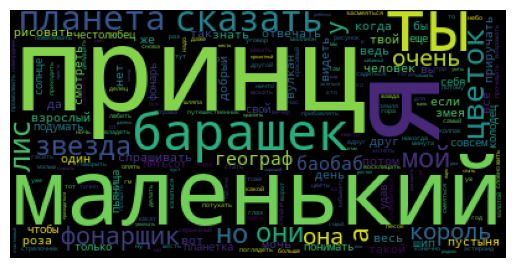

In [237]:
wordcloud = WordCloud().generate_from_frequencies(prince_lemmas_dict)
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

In [511]:
# а теперь попробуем красиво
# комментарии и подробности тут: https://github.com/TFrolova/Project_CL_Python/blob/main/notebooks/creating%20a%20picture%20How.ipynb
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [512]:
mask = np.array(Image.open("Prince_image.png"))
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [513]:
def transform_zeros(val):
    if val == 0: 
       return 255
    else:
       return val

In [514]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

In [515]:
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

In [517]:
wc = WordCloud(background_color="white", max_words=2000, mask=maskable_image,
                contour_width=3, contour_color='steelblue')
wc.generate_from_frequencies(prince_lemmas_dict)

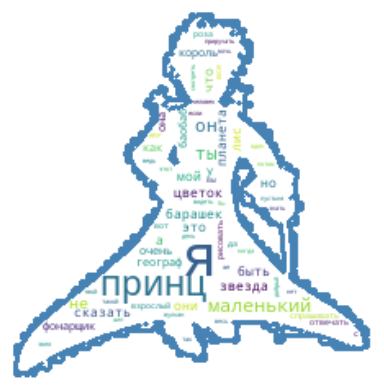

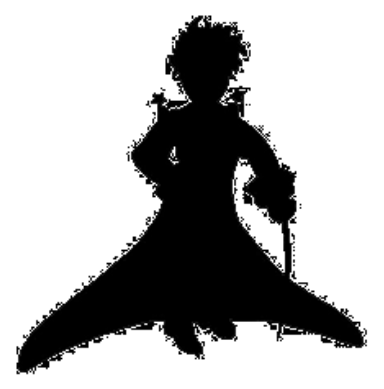

In [518]:
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(maskable_image, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()